In [1]:
import matplotlib.pyplot as plt
import numpy as np

MAX_ANGLE = 60

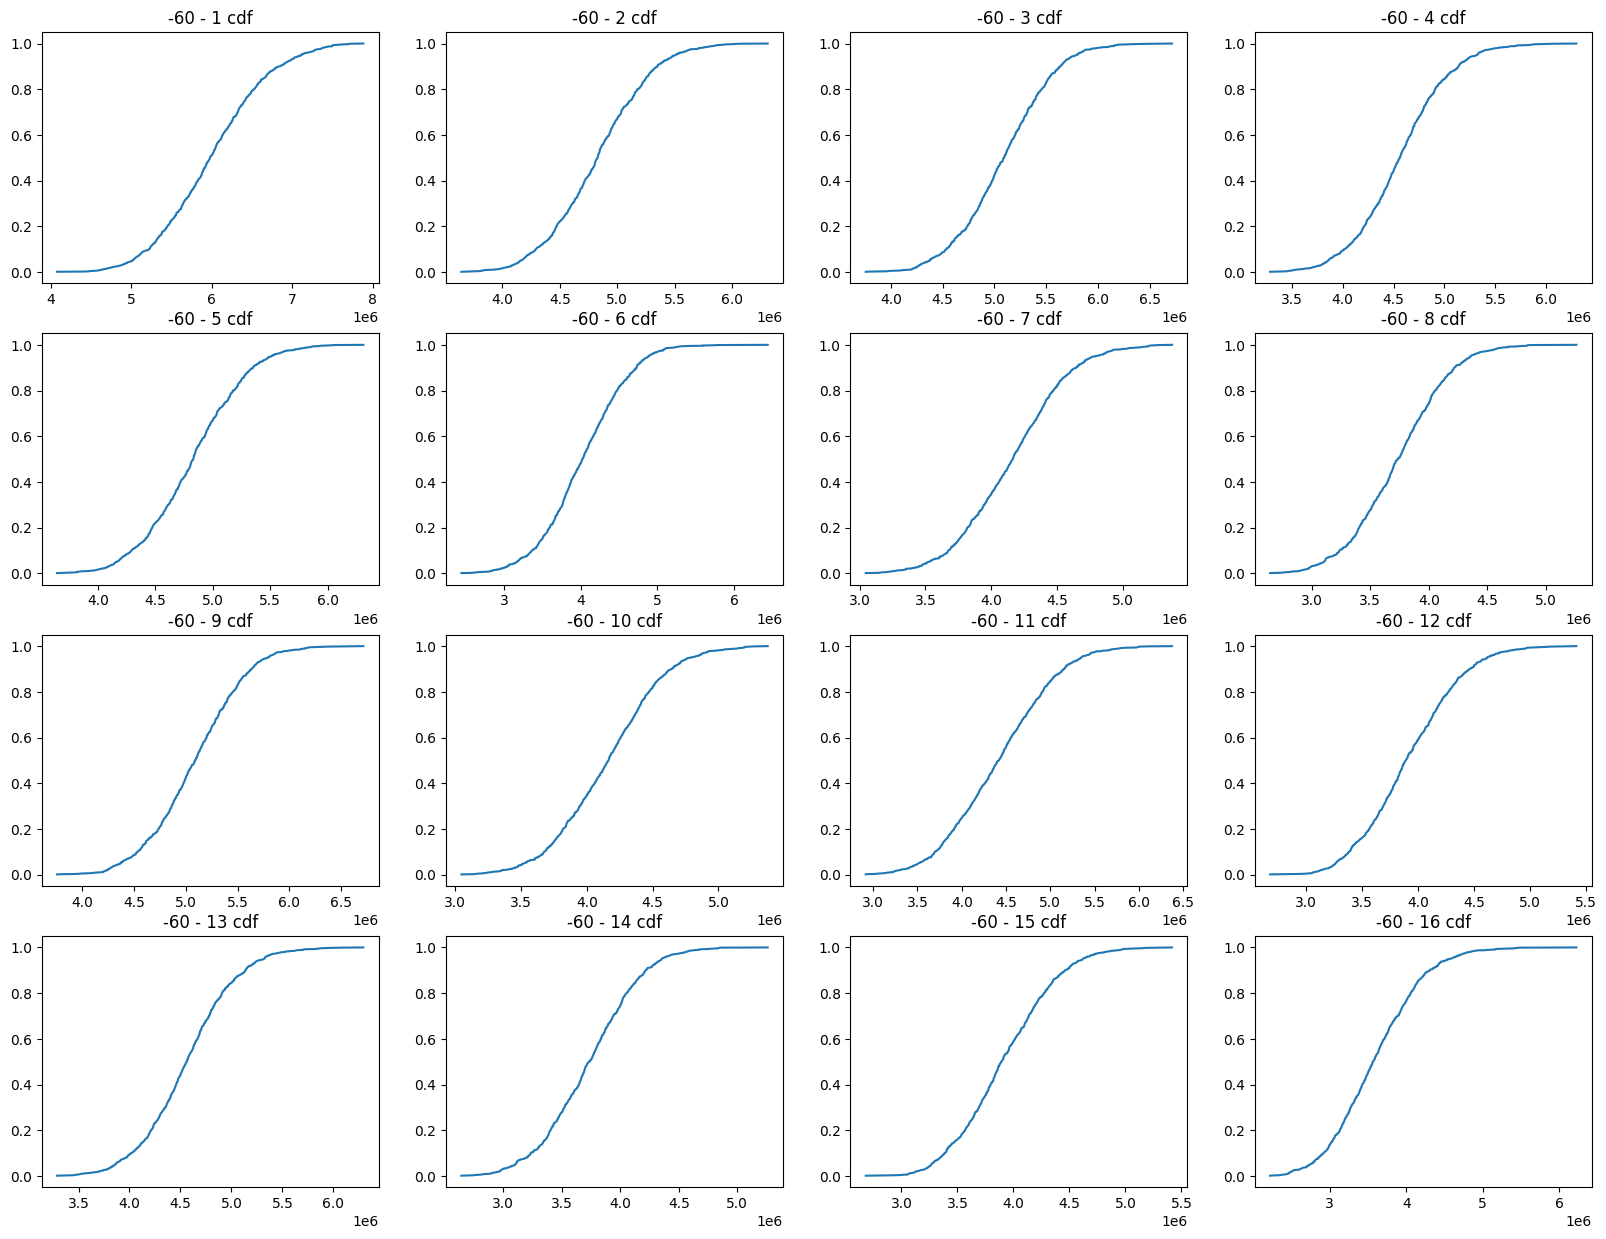

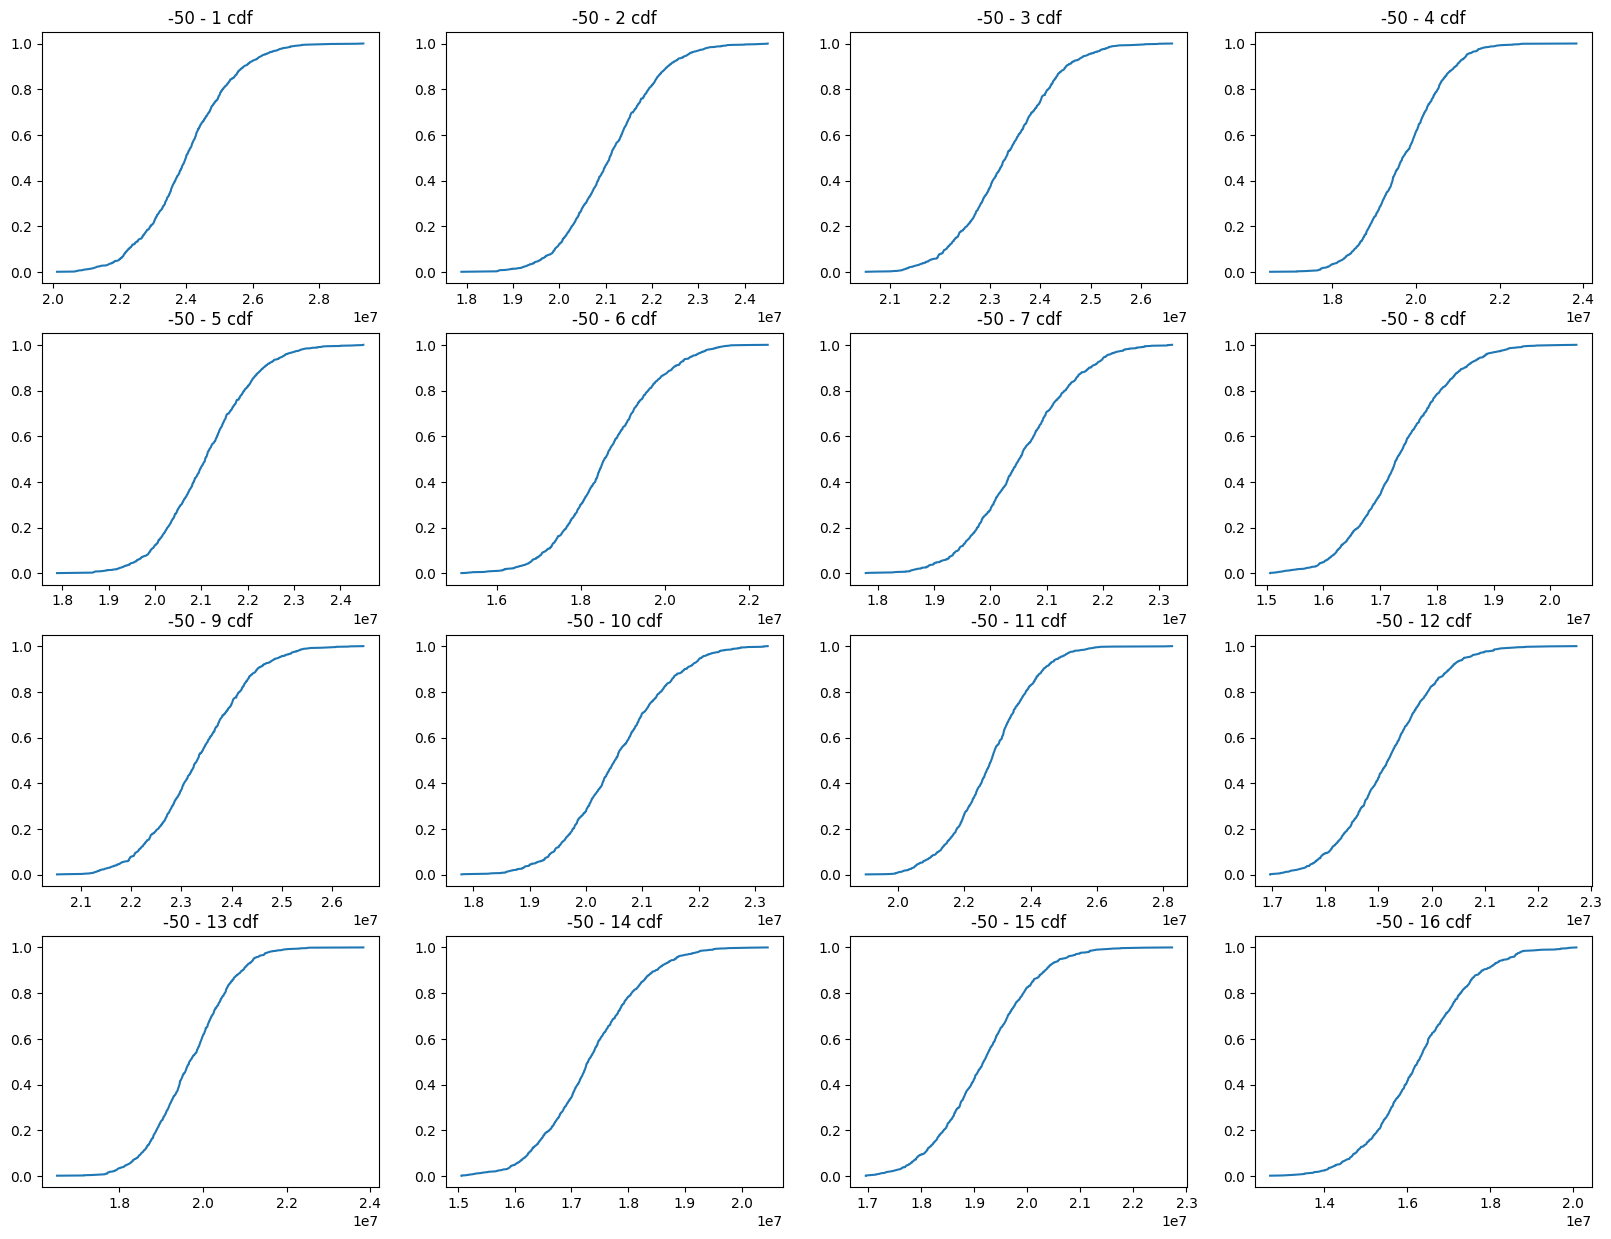

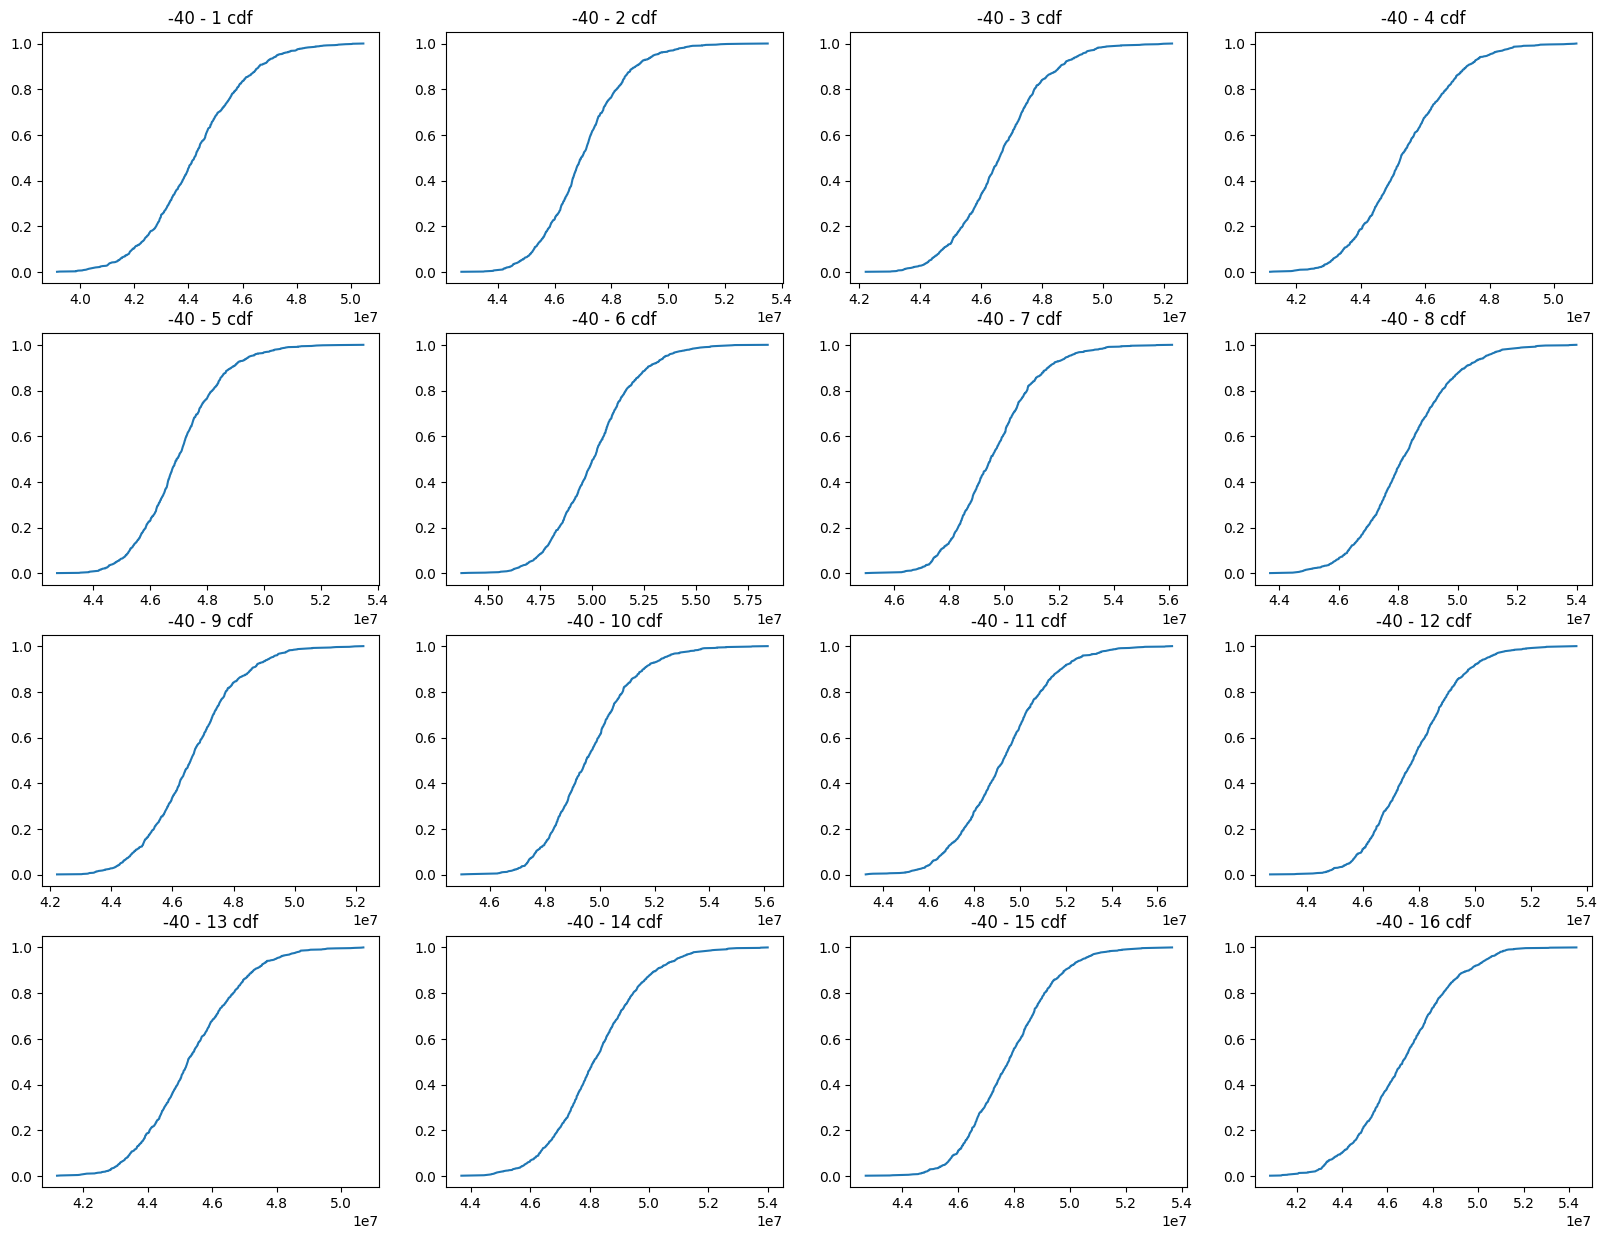

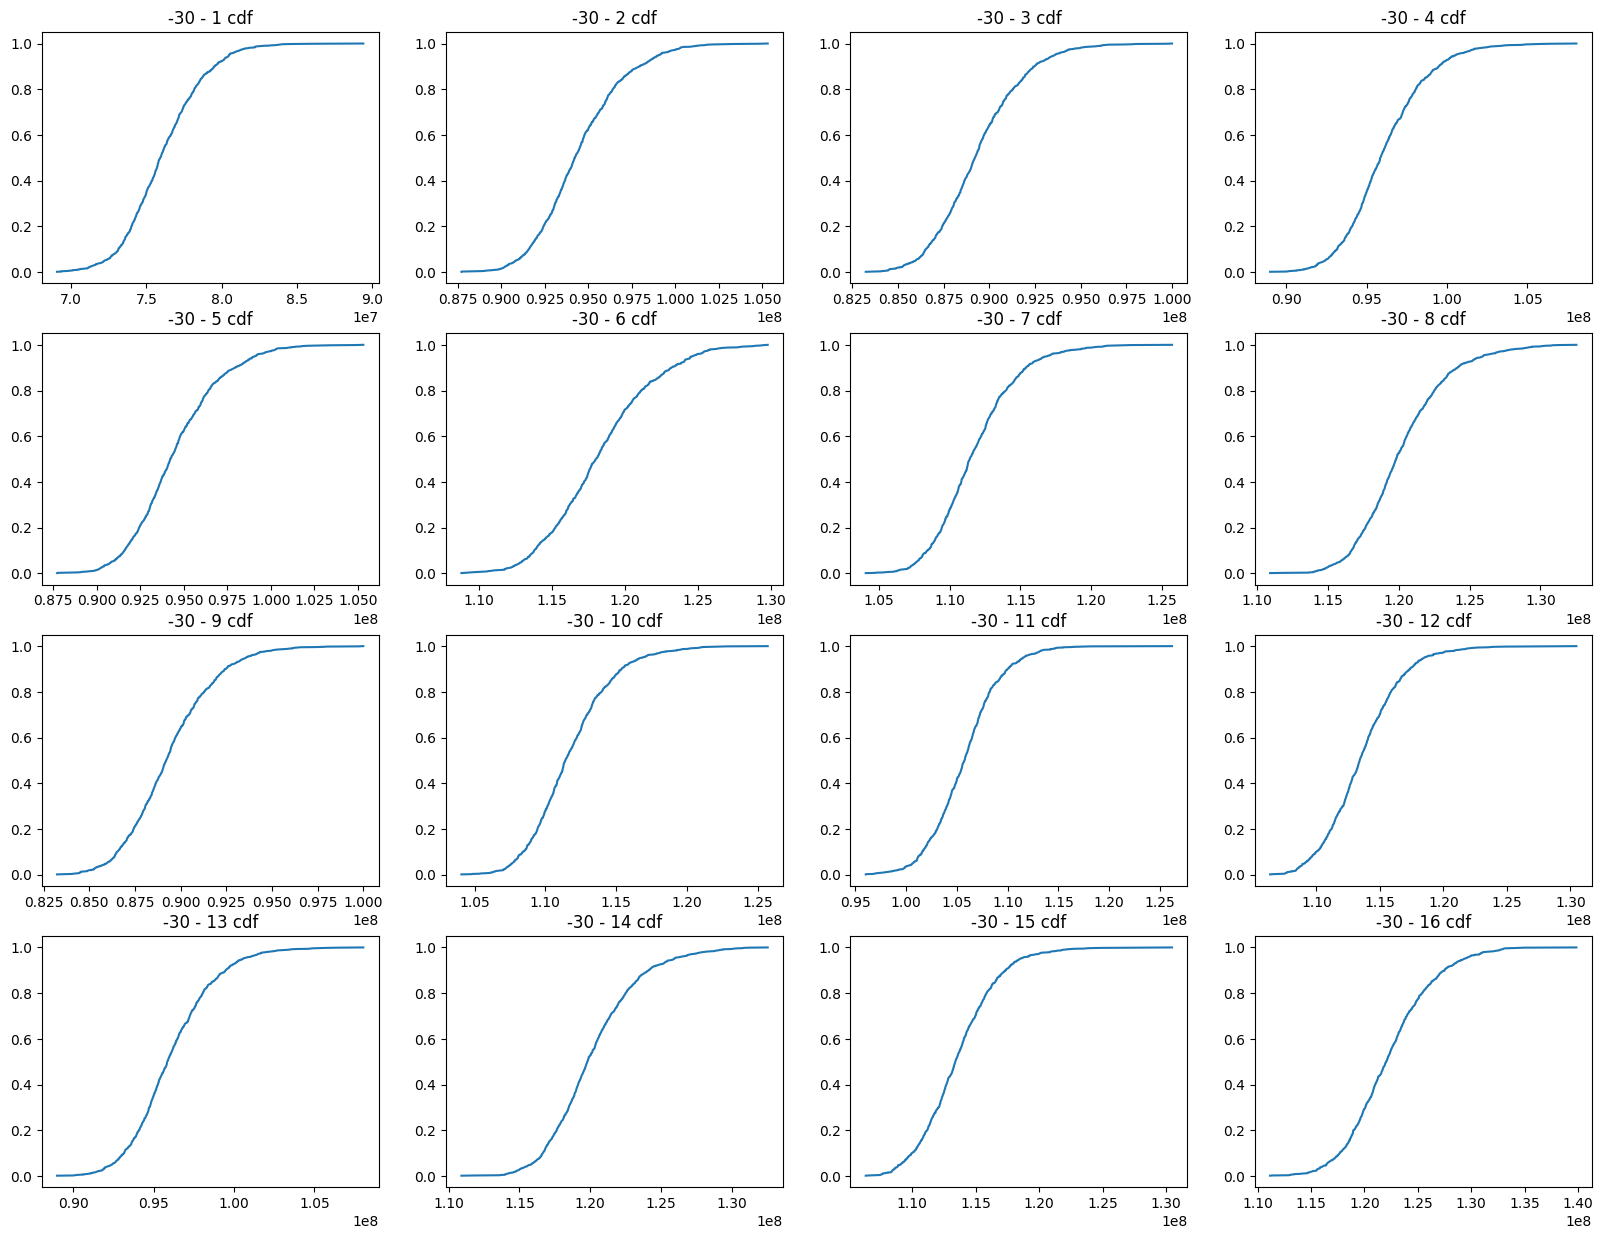

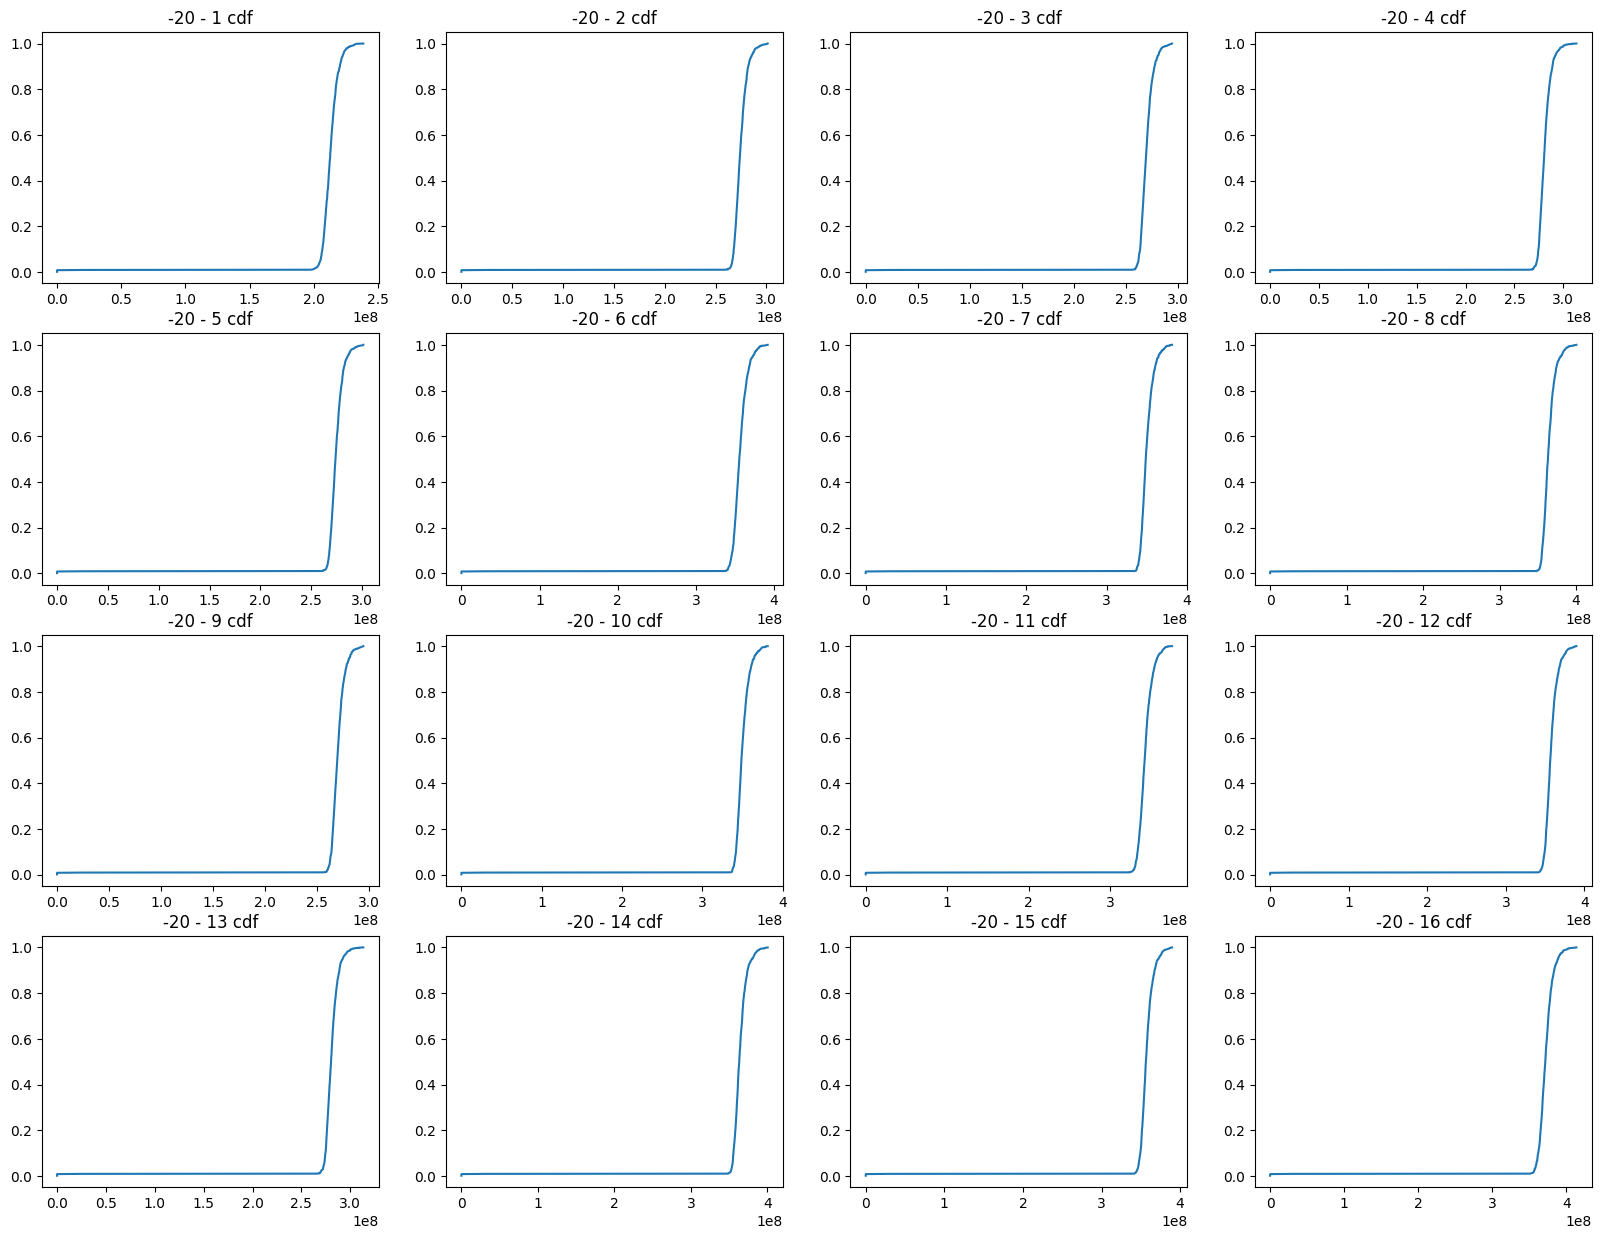

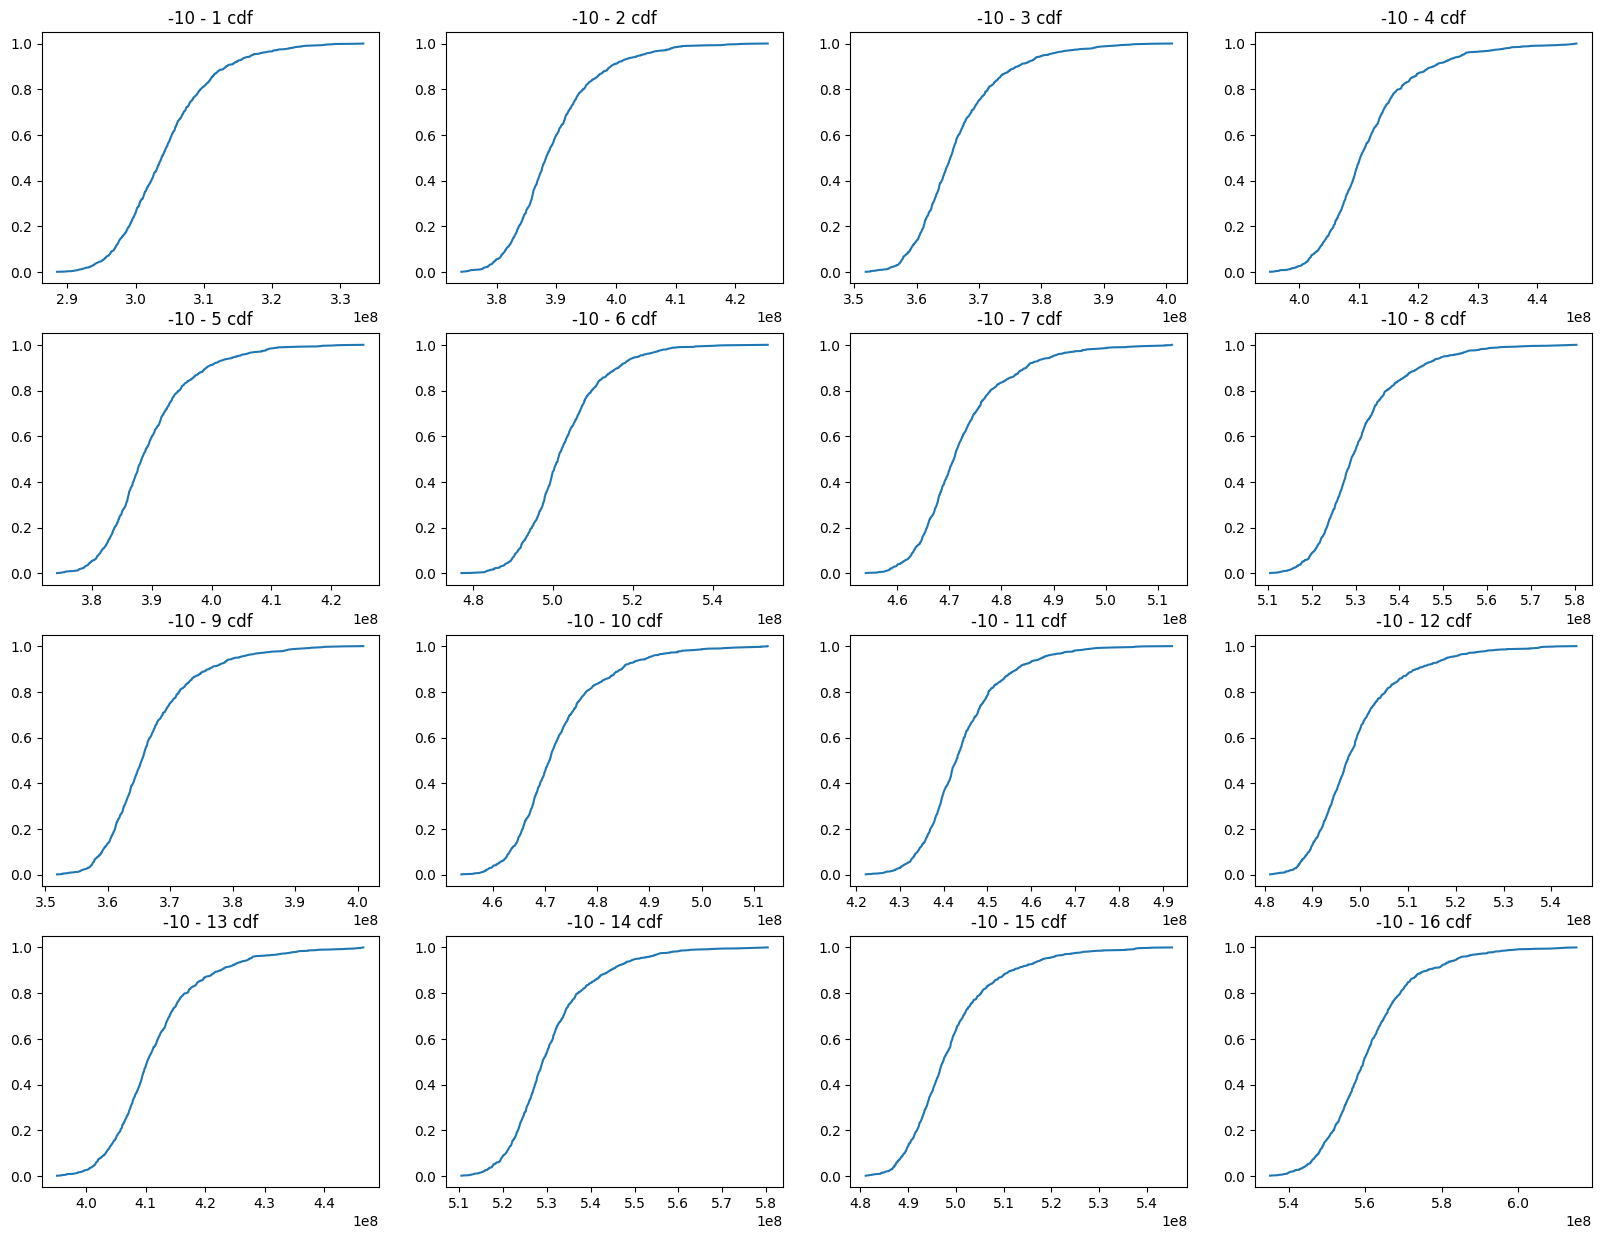

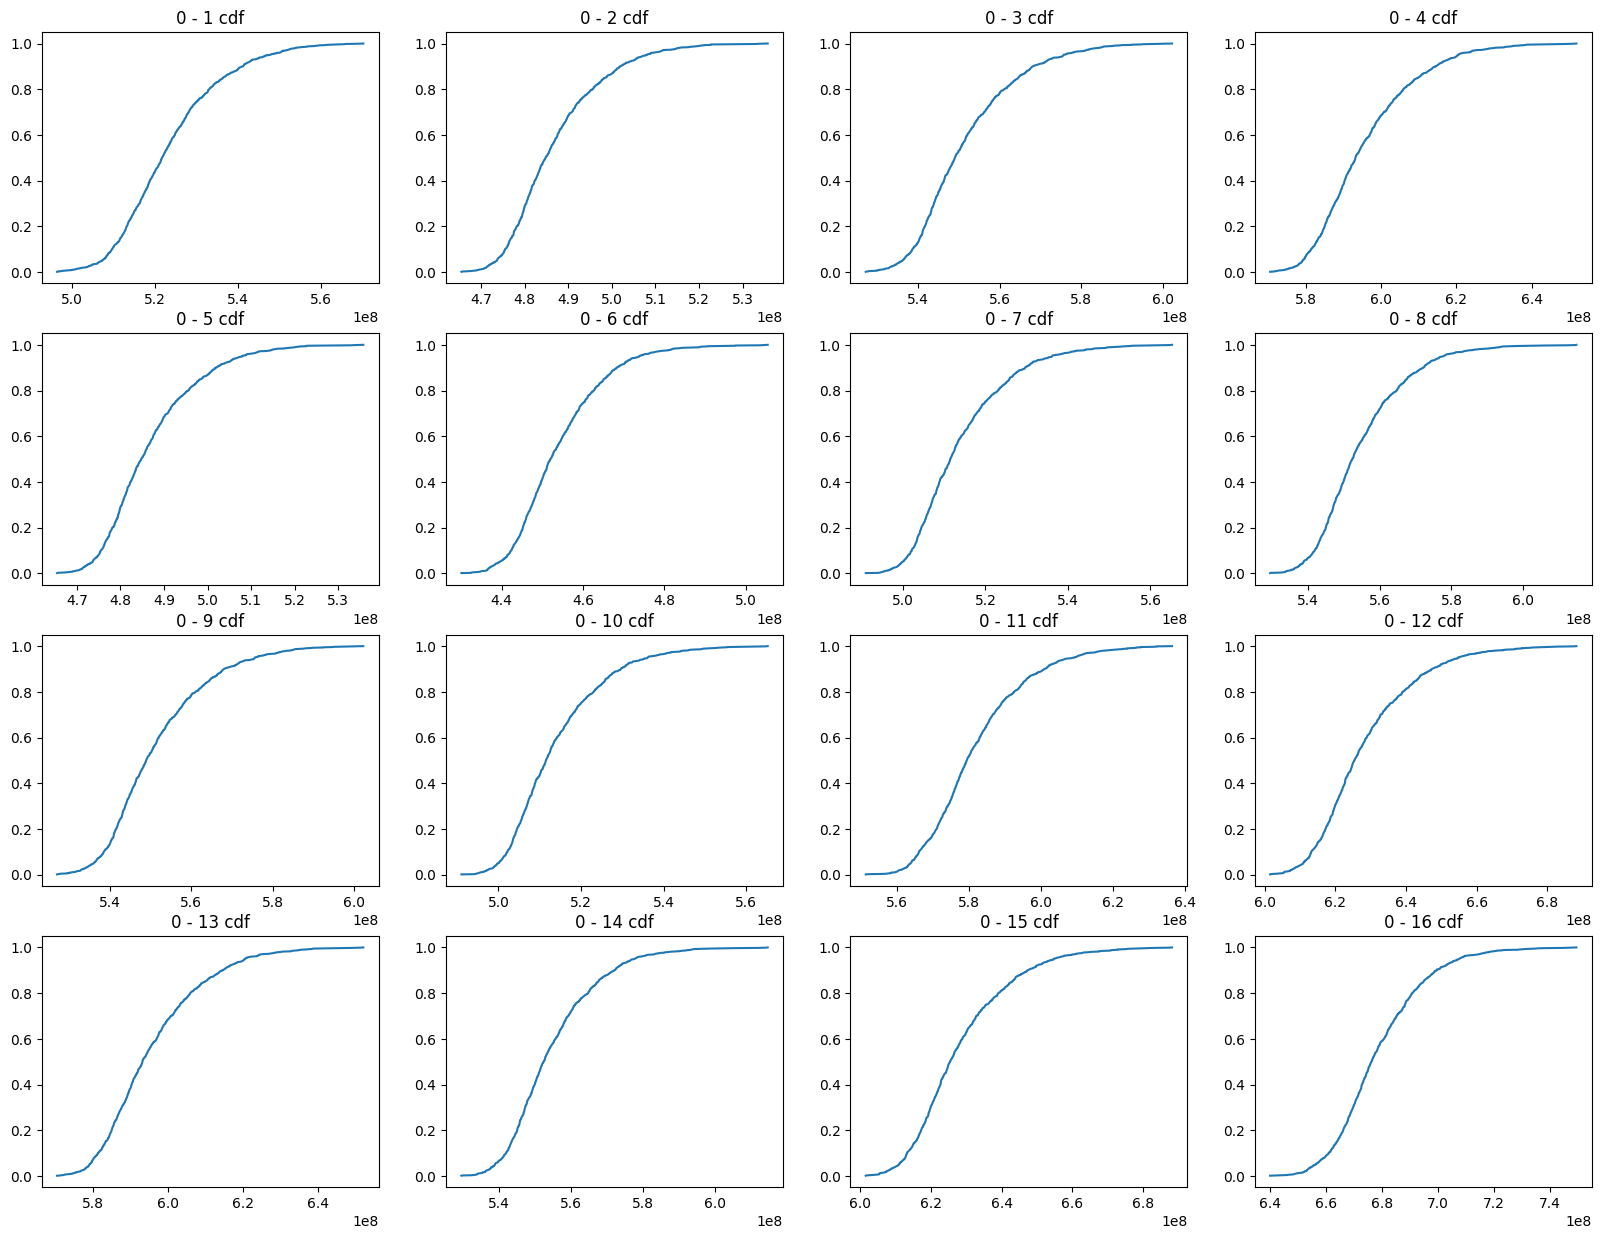

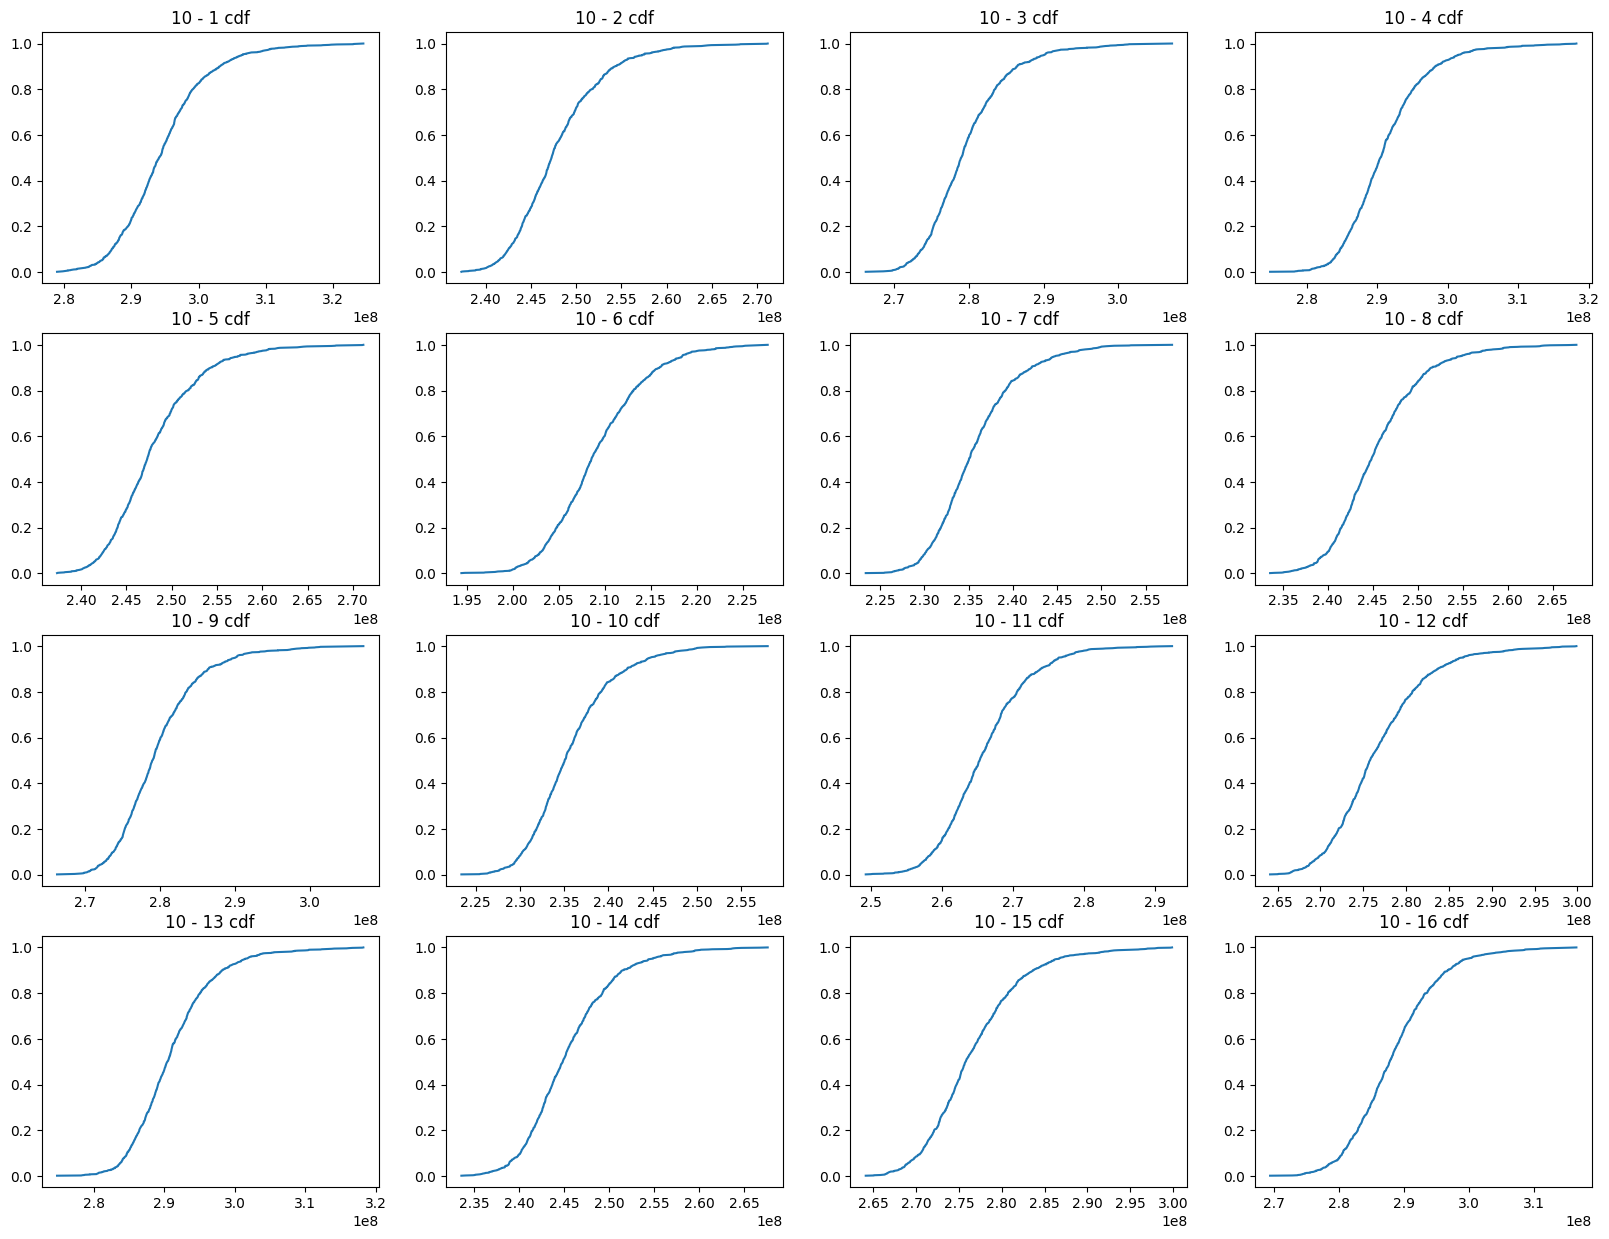

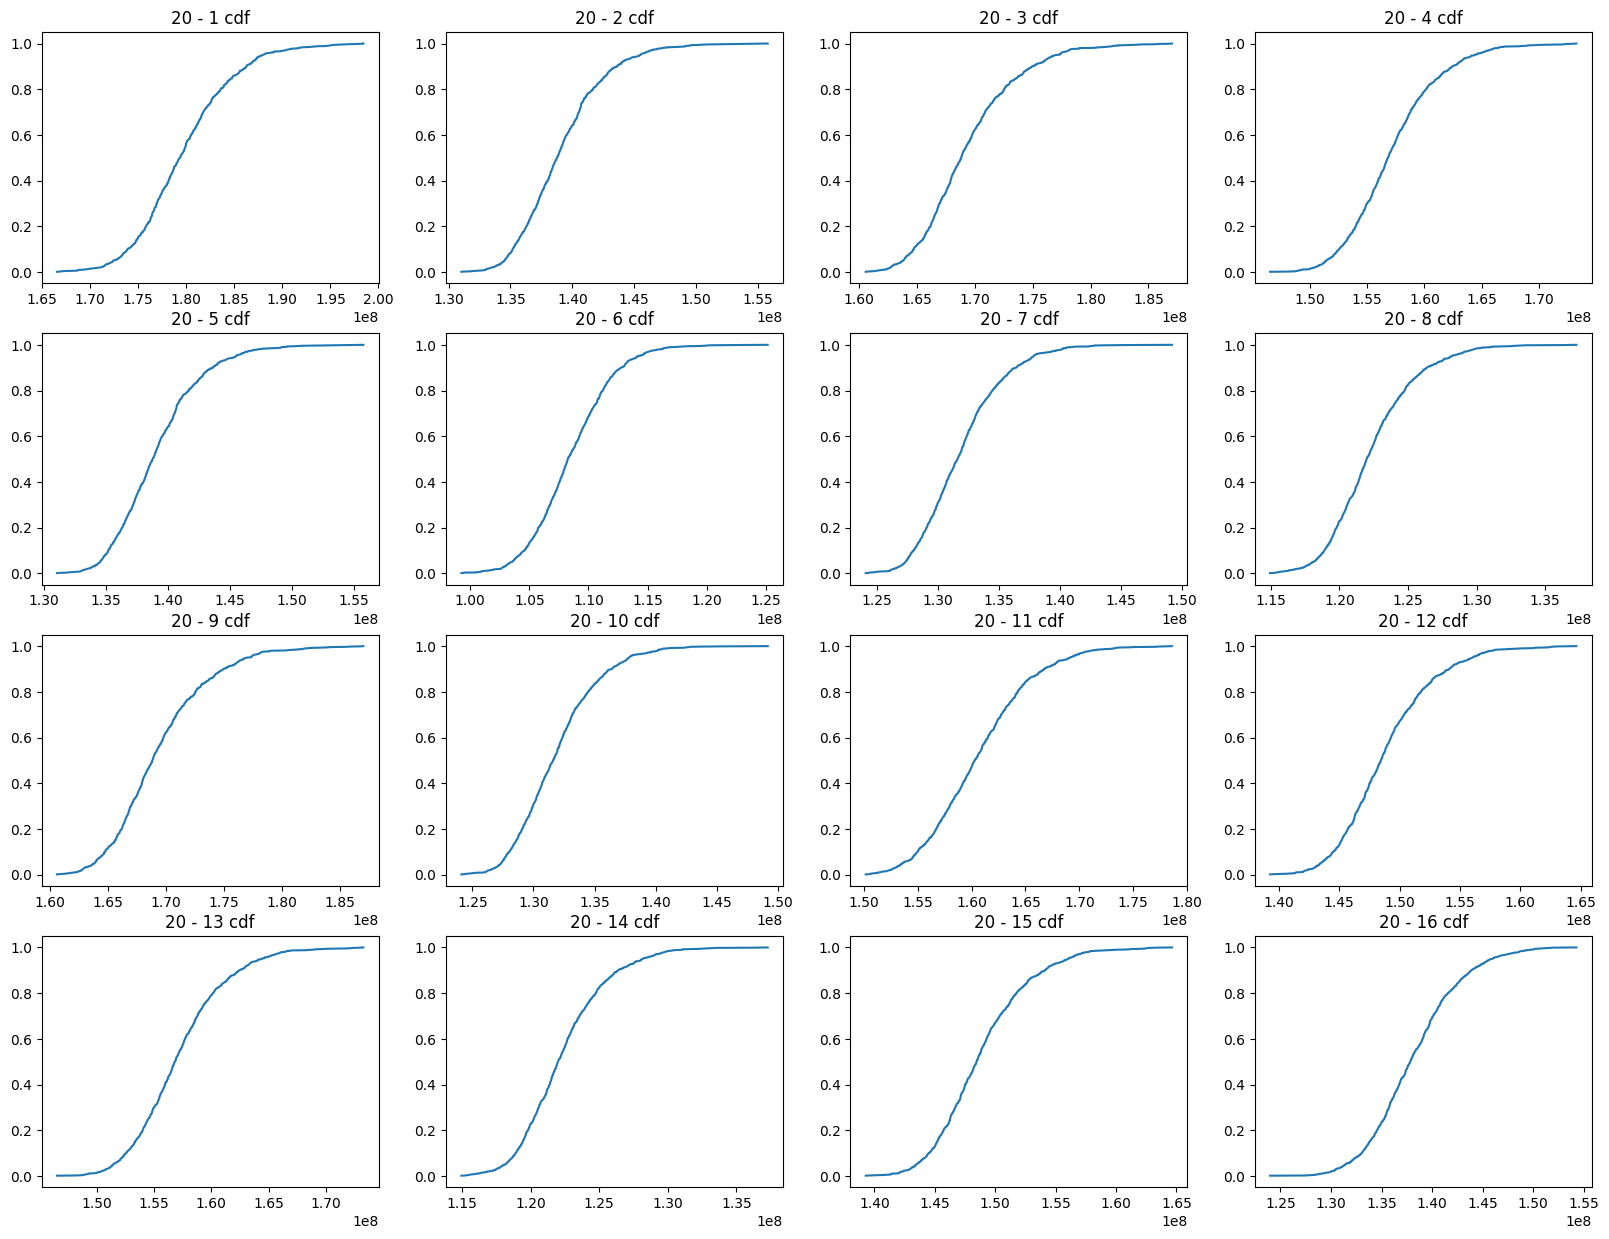

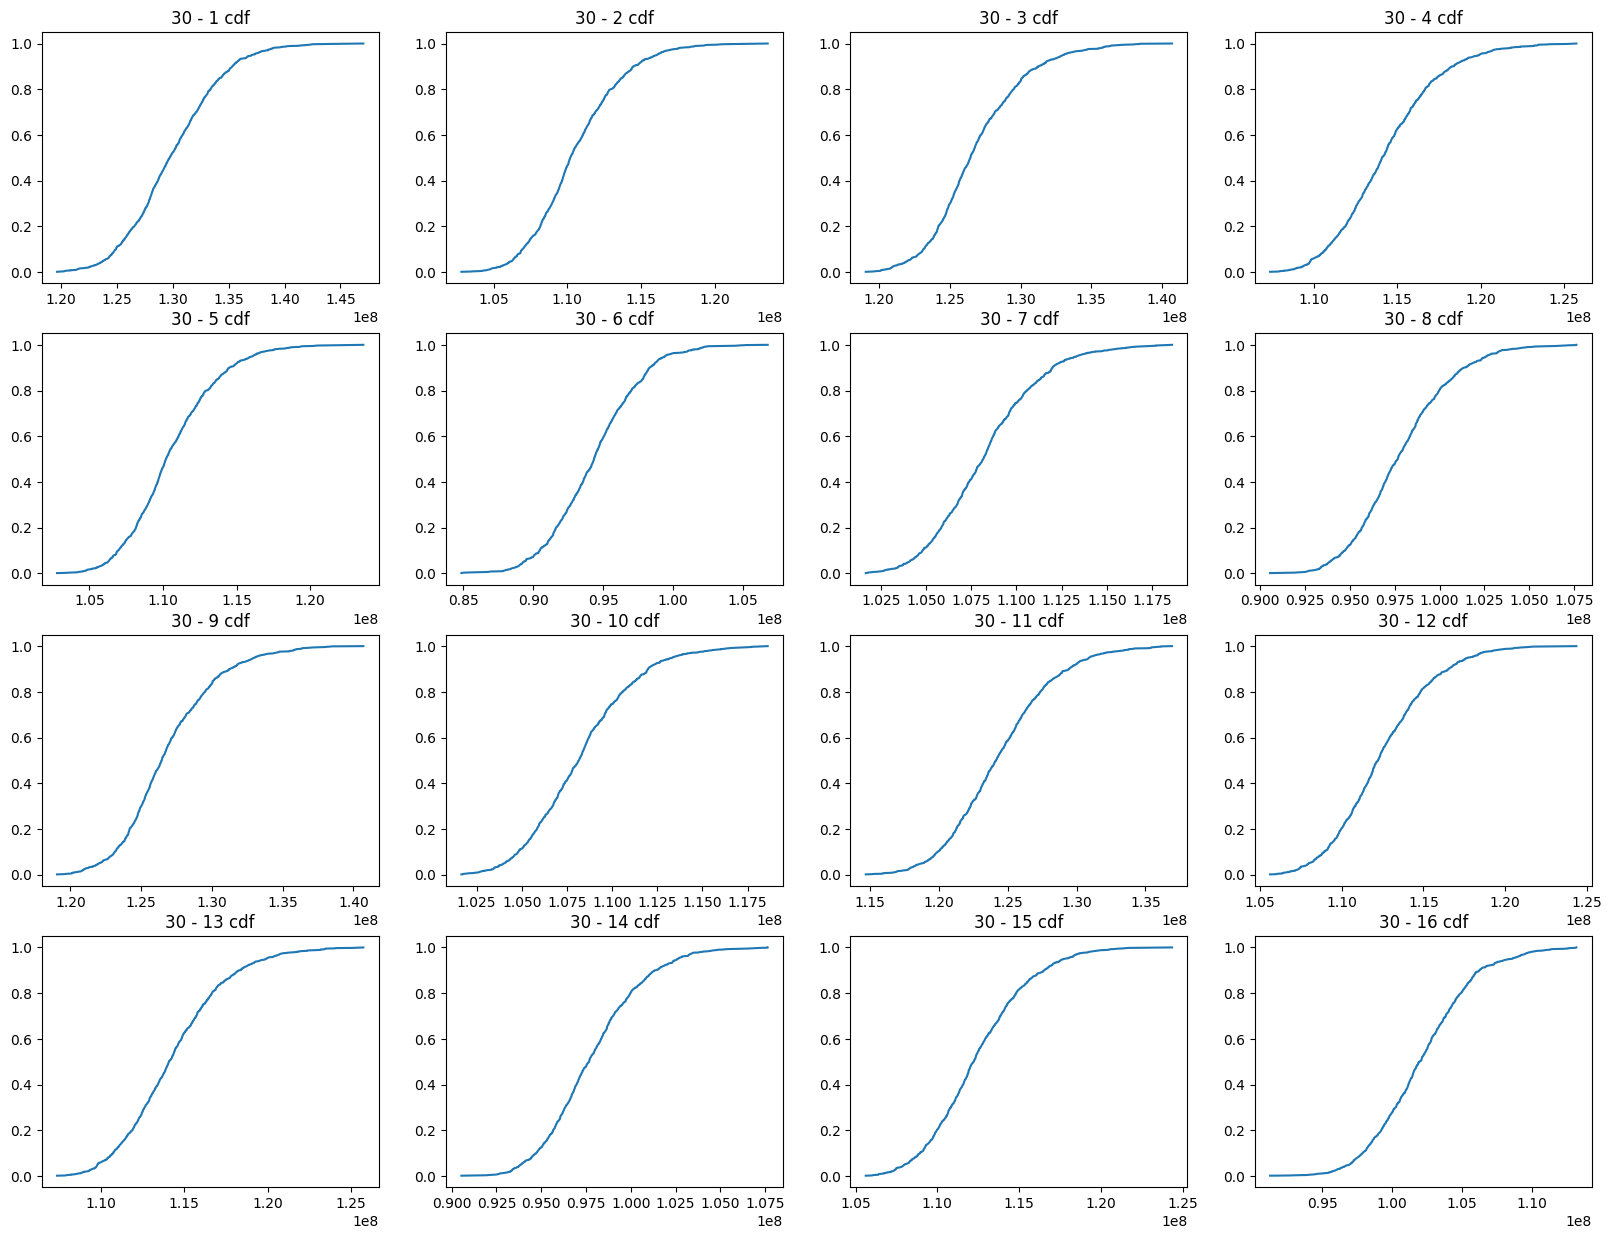

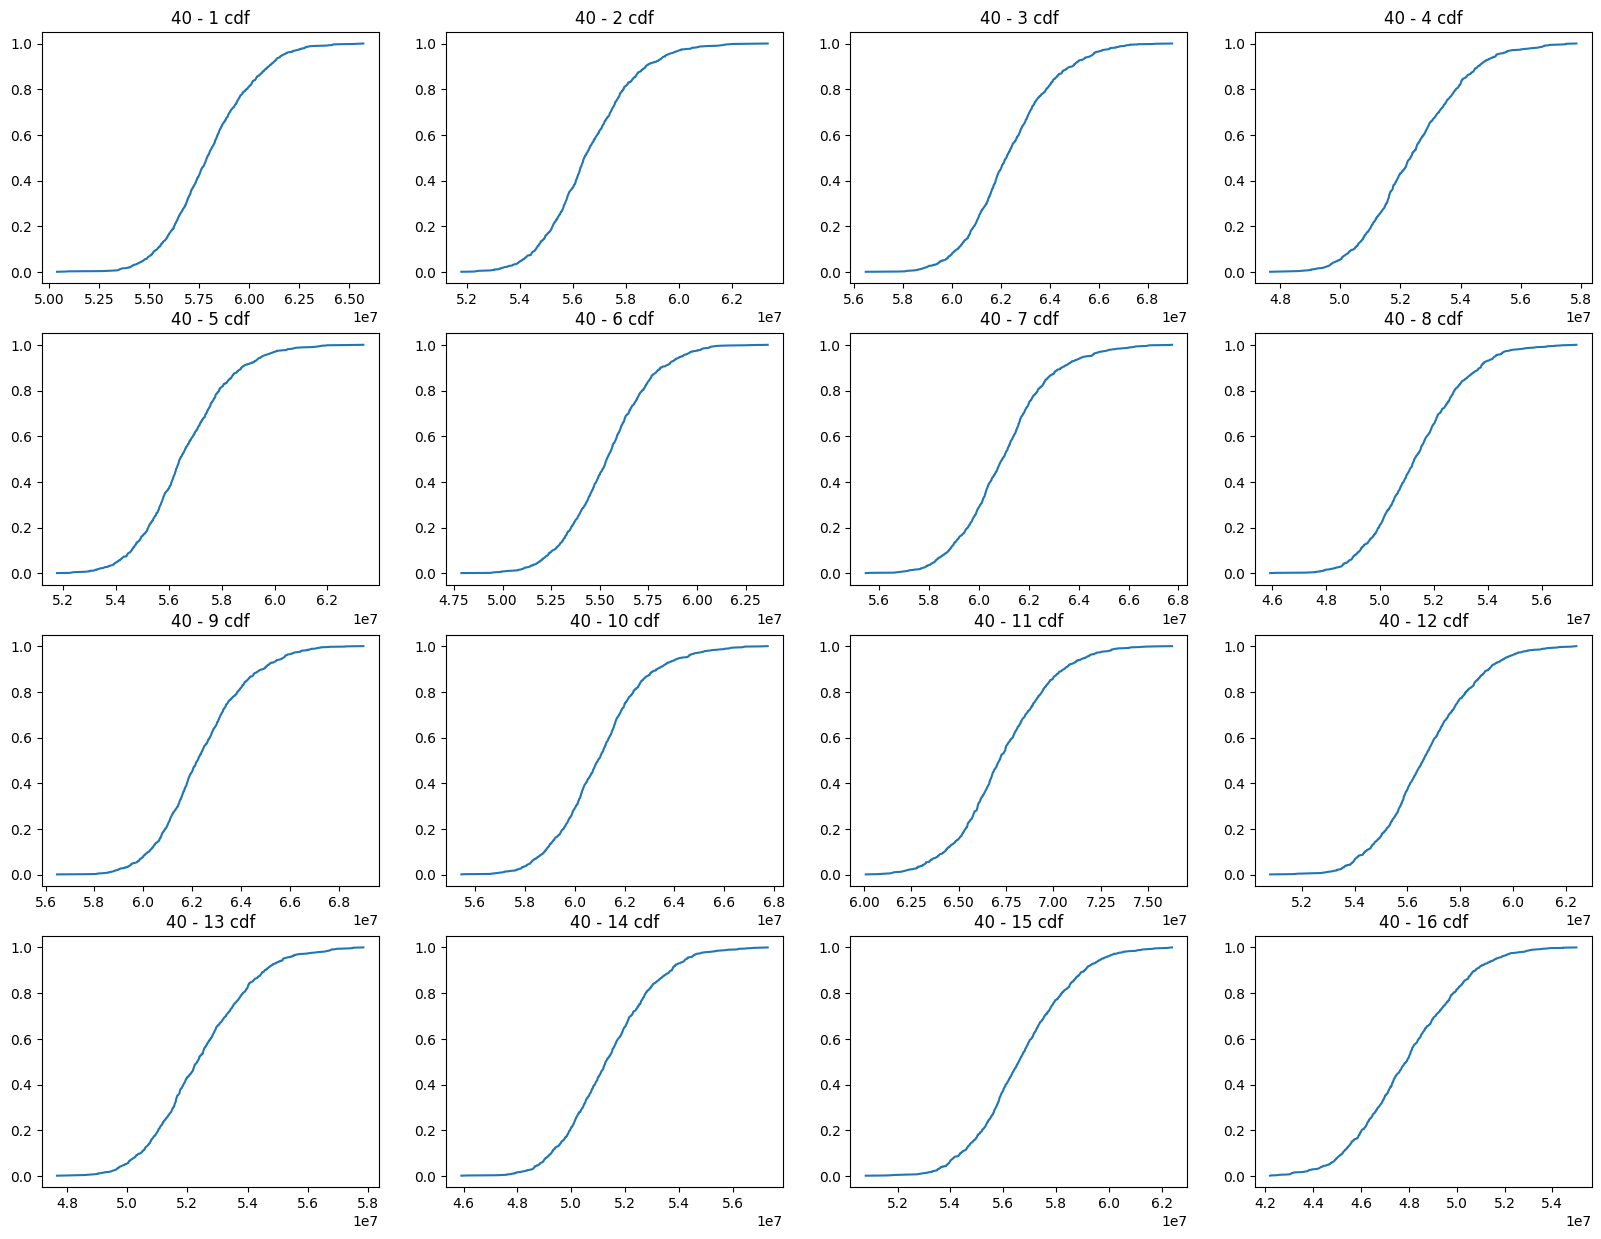

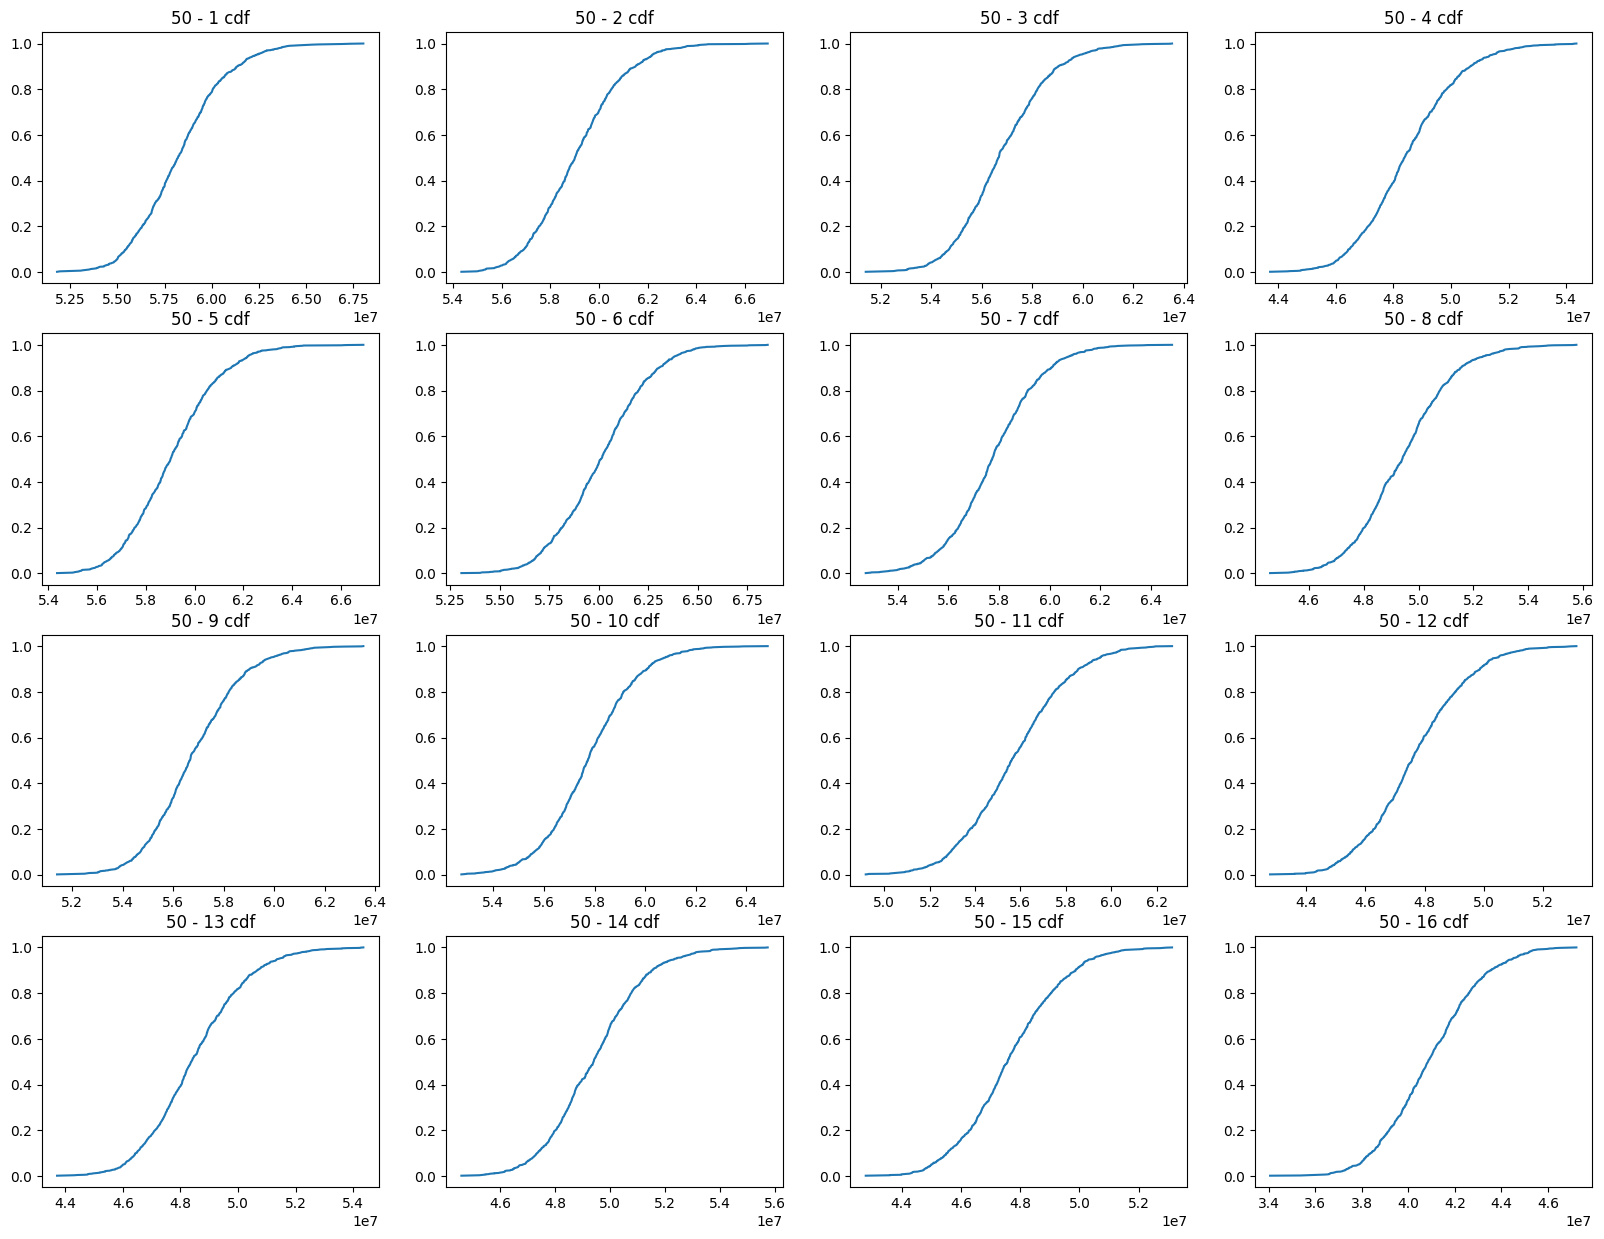

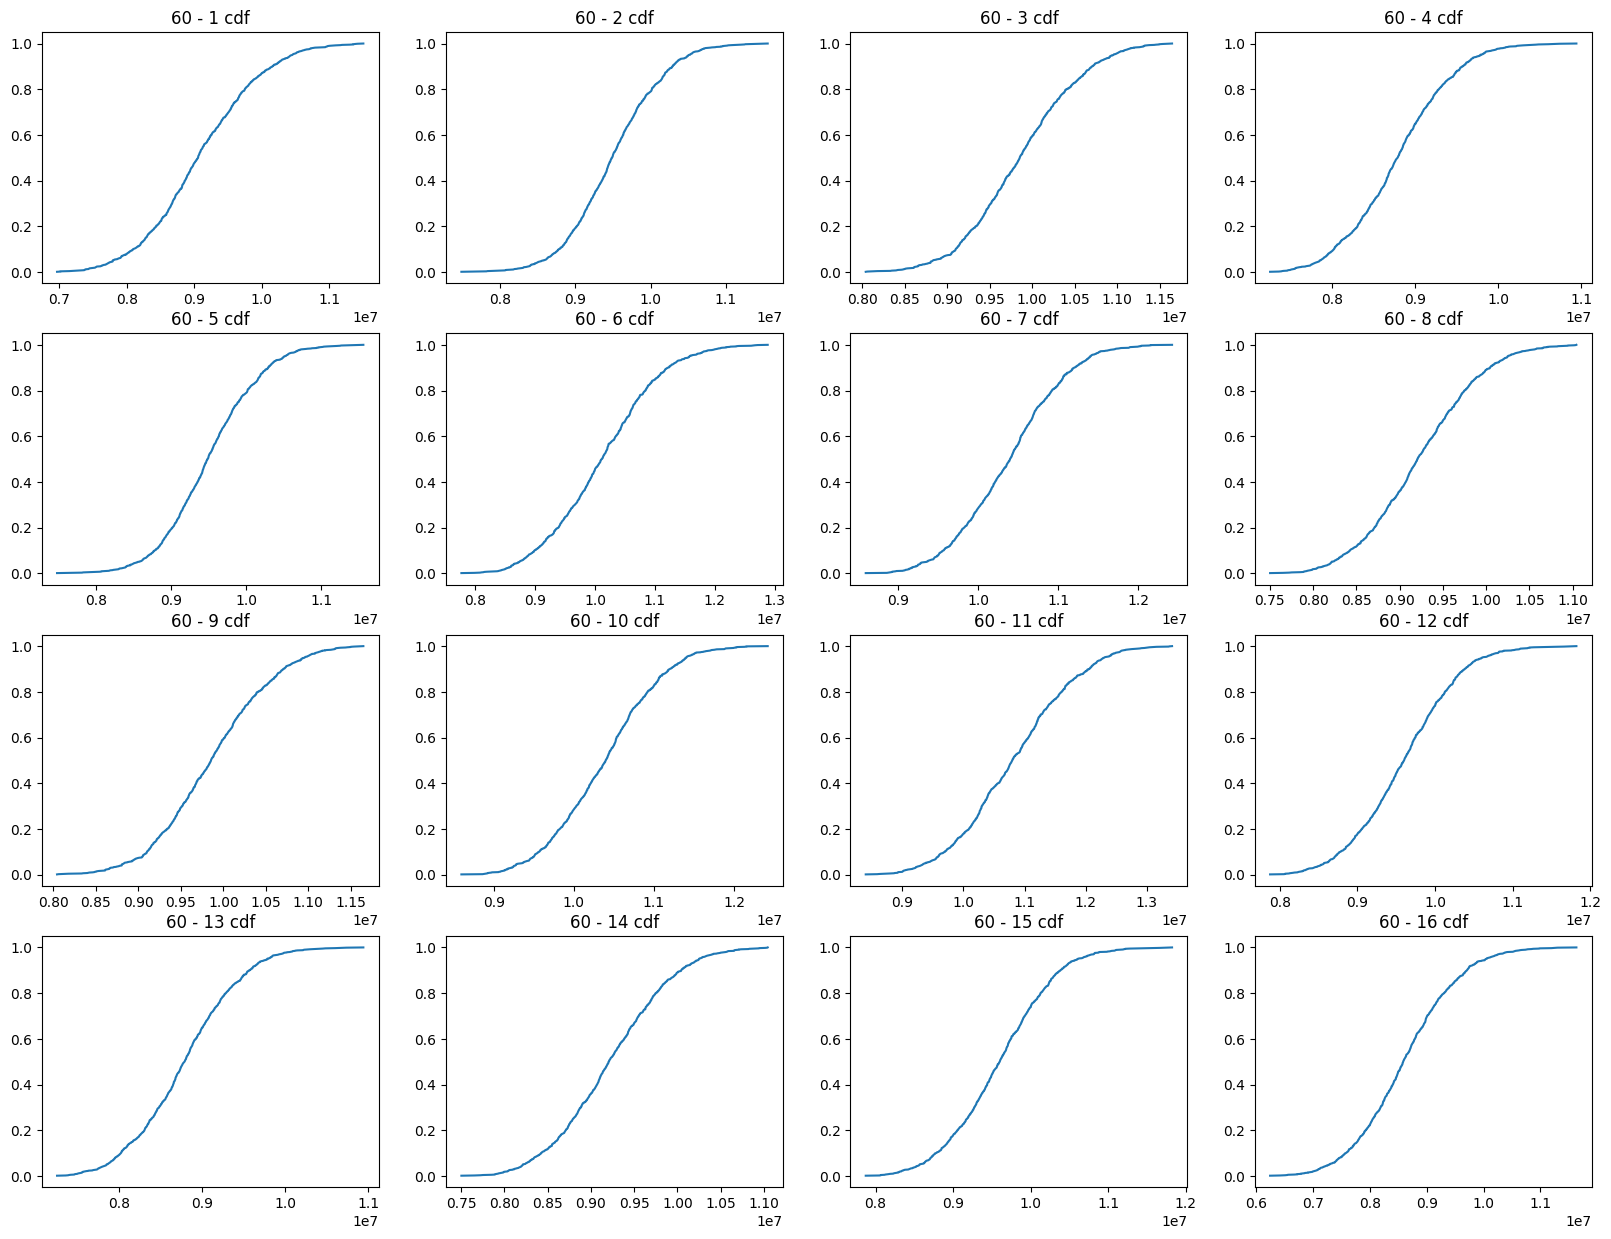

In [3]:
path = './data/23_12_22_data/data/'

for angle_value in range(-MAX_ANGLE, MAX_ANGLE+1, 10):
    Rx_sig = np.load(path + f'output_COV_{angle_value}.npy')
    
    plt.figure(figsize=(20, 15))
    max_idxs = []

    Rx_sig_2 = Rx_sig.reshape(-1, 16)
    for _idx in range(16):
        Rx_sig_2_1 = Rx_sig_2[:, _idx]
        total = len(Rx_sig_2_1)
        cdf_value = np.zeros(total)
        cdf_value_idx = np.zeros(total)

        Rx_sig_2_1 = np.sort(np.abs(Rx_sig_2_1))
        prev_value = -1
        idx,val = 0,0
        for value in Rx_sig_2_1:
            if np.abs(prev_value - value) != 0: 
                val += 1
                cdf_value[idx] = val/total
                prev_value = value
                cdf_value_idx[idx] = value
                idx += 1
                
            else:
                val += 1
                cdf_value[idx] = val/total
                
        max_idx = int(np.where(cdf_value_idx == max(cdf_value_idx))[0])
        max_idx_2 = int(np.where(cdf_value == 0.5)[0])
        
        max_idxs.append(max_idx)
        plt.subplot(4, 4, _idx + 1)
        plt.plot(cdf_value_idx[:max_idx+1], cdf_value[:max_idx+1])
        plt.title(f"{angle_value} - {_idx + 1} cdf")

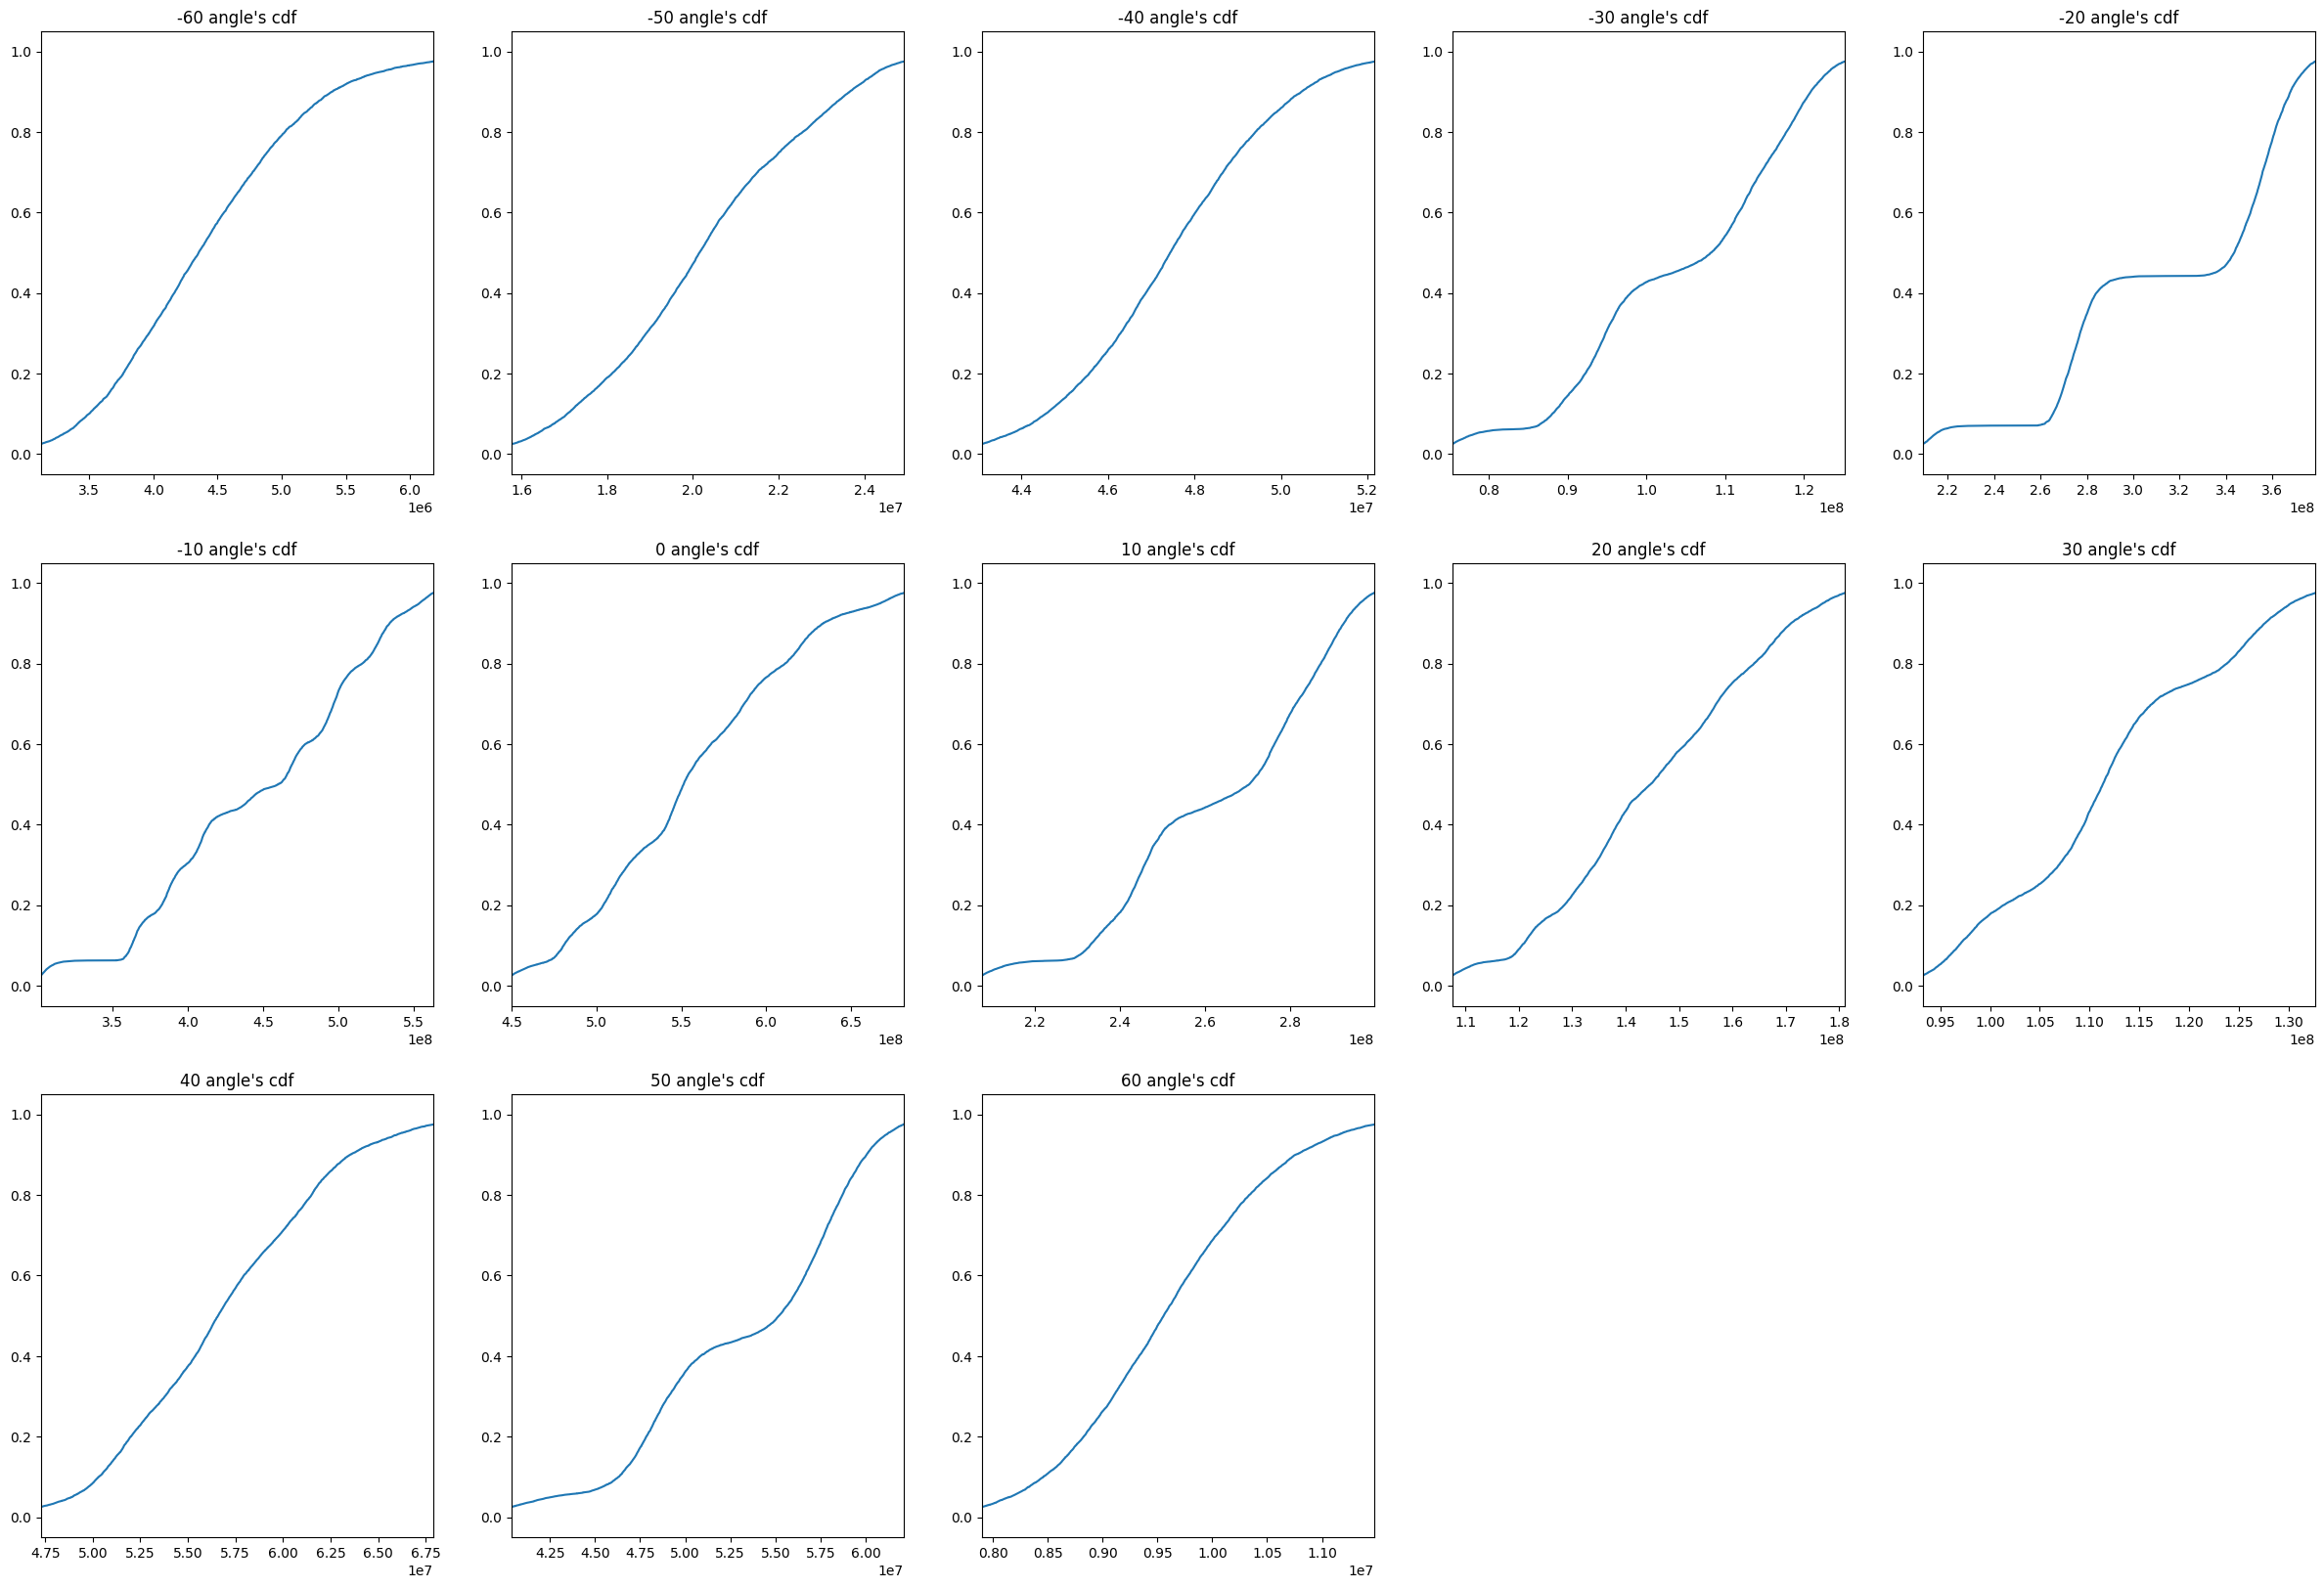

In [4]:
plt.figure(figsize=(30, 20))
path = './data/23_12_22_data/data'

for plt_idx, angle_value in enumerate(range(-MAX_ANGLE, MAX_ANGLE+1, 10), 1):
    Rx_sig = np.load(path + f'/output_COV_{angle_value}.npy')

    Rx_sig_abs = np.sort(np.abs(Rx_sig.reshape(-1)))
    total_len = len(Rx_sig_abs)
    cdf_value, cdf_value_idx = np.zeros(total_len), np.zeros(total_len)

    prev_value, cdf_idx, each_cnt = -1, 0, 0
    
    for value in Rx_sig_abs:
        each_cnt += 1
        if prev_value != value: 
            cdf_value[cdf_idx] = each_cnt/total_len
            cdf_value_idx[cdf_idx] = value

            prev_value = value
            cdf_idx += 1
        else:
            cdf_value[cdf_idx] = each_cnt/total_len
        
    max_idx = int(np.where(cdf_value == 1.0)[0])
    cdf_value, cdf_value_idx = cdf_value[:max_idx+1], cdf_value_idx[:max_idx+1]

    min_value, max_value = int(np.max(np.where(cdf_value <= 0.025)[0])), int(np.min(np.where(cdf_value >= 0.975)[0]))   # 2 sigma 
    
    plt.subplot(3, 5, plt_idx)
    plt.plot(cdf_value_idx[:max_idx+1], cdf_value[:max_idx+1])
    plt.xlim((cdf_value_idx[min_value], cdf_value_idx[max_value]))
    plt.title(f"{angle_value} angle's cdf")